### TASK #1: Understand The Problema Statement 

- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location.

- Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

### TASK #2: Import Libraries And Datasets

TYPES OF AVAILABLE SAGEMAKER IMAGES 
- Data Science [datascience-1.0]: Data Science is a Conda image with the most commonly used Python packages and libraries, such as NumPy and SciKit Learn.
- Base Python [python-3.6]
- MXNet (optimized for CPU) [mxnet-1.6-cpu-py36]
- MXNet (optimized for GPU) [mxnet-1.6-gpu-py36]
- PyTorch (optimized for CPU) [pytorch-1.4-cpu-py36]
- PyTorch (optimized for GPU) [pytorch-1.4-gpu-py36]
- TensorFlow (optimized for CPU) [tensorflow-1.15-cpu-py36]
- TensorFlow (optimized for GPU) [tensorflow-1.15-gpu-py36]
- TensorFlow 2 (optimized for CPU) [tensorflow-2.1-cpu-py36]
- TensorFlow 2 (optimized for GPU) [tensorflow-2.1-gpu-py36]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MINI CHALLENGE
- Read the CSV file "insurance.csv" using pandas 
- Visualize the first and last 5 rows 

In [3]:
insurance_df = pd.read_csv('insurance.csv')
print(insurance_df.shape)
insurance_df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### TASK #3: Perfomr Exploratory Data Analysis:

<AxesSubplot:>

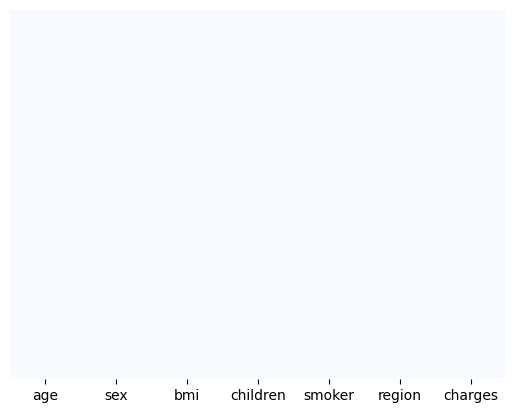

In [5]:
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [6]:
# Check if there are any Null Value
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Check Statistical dataframe info
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index ***
df_region = insurance_df.groupby(by = 'region', sort= True).mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


MINI CHALLENGE
- Group data by 'age' and examine the relationship between 'age' and 'charges'

In [10]:
df_age = insurance_df.groupby(by = 'age', sort = True).mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [11]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
# Convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [13]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
# Check the uniwue values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
# Convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [16]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)

In [19]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [20]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [21]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [22]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)

In [23]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


MINI CHALLENGE
- Calculate the mean and standard deviation of the age, charges and bmi

In [24]:
insurance_df_ = insurance_df[['age', 'charges', 'bmi']]
print(insurance_df_.shape)
insurance_df_.head()

(1338, 3)


,age,charges,bmi
0,19,16884.92400,27.900
1,18,1725.55230,33.770
2,28,4449.46200,33.000
3,33,21984.47061,22.705
4,32,3866.85520,28.880


In [25]:
insurance_df_.describe()

,age,charges,bmi
count,1338.000000,1338.000000,1338.000000
mean,39.207025,13270.422265,30.663397
std,14.049960,12110.011237,6.098187
min,18.000000,1121.873900,15.960000
25%,27.000000,4740.287150,26.296250
50%,39.000000,9382.033000,30.400000
75%,51.000000,16639.912515,34.693750
max,64.000000,63770.428010,53.130000


### TASK #4: Visualize Dataset

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

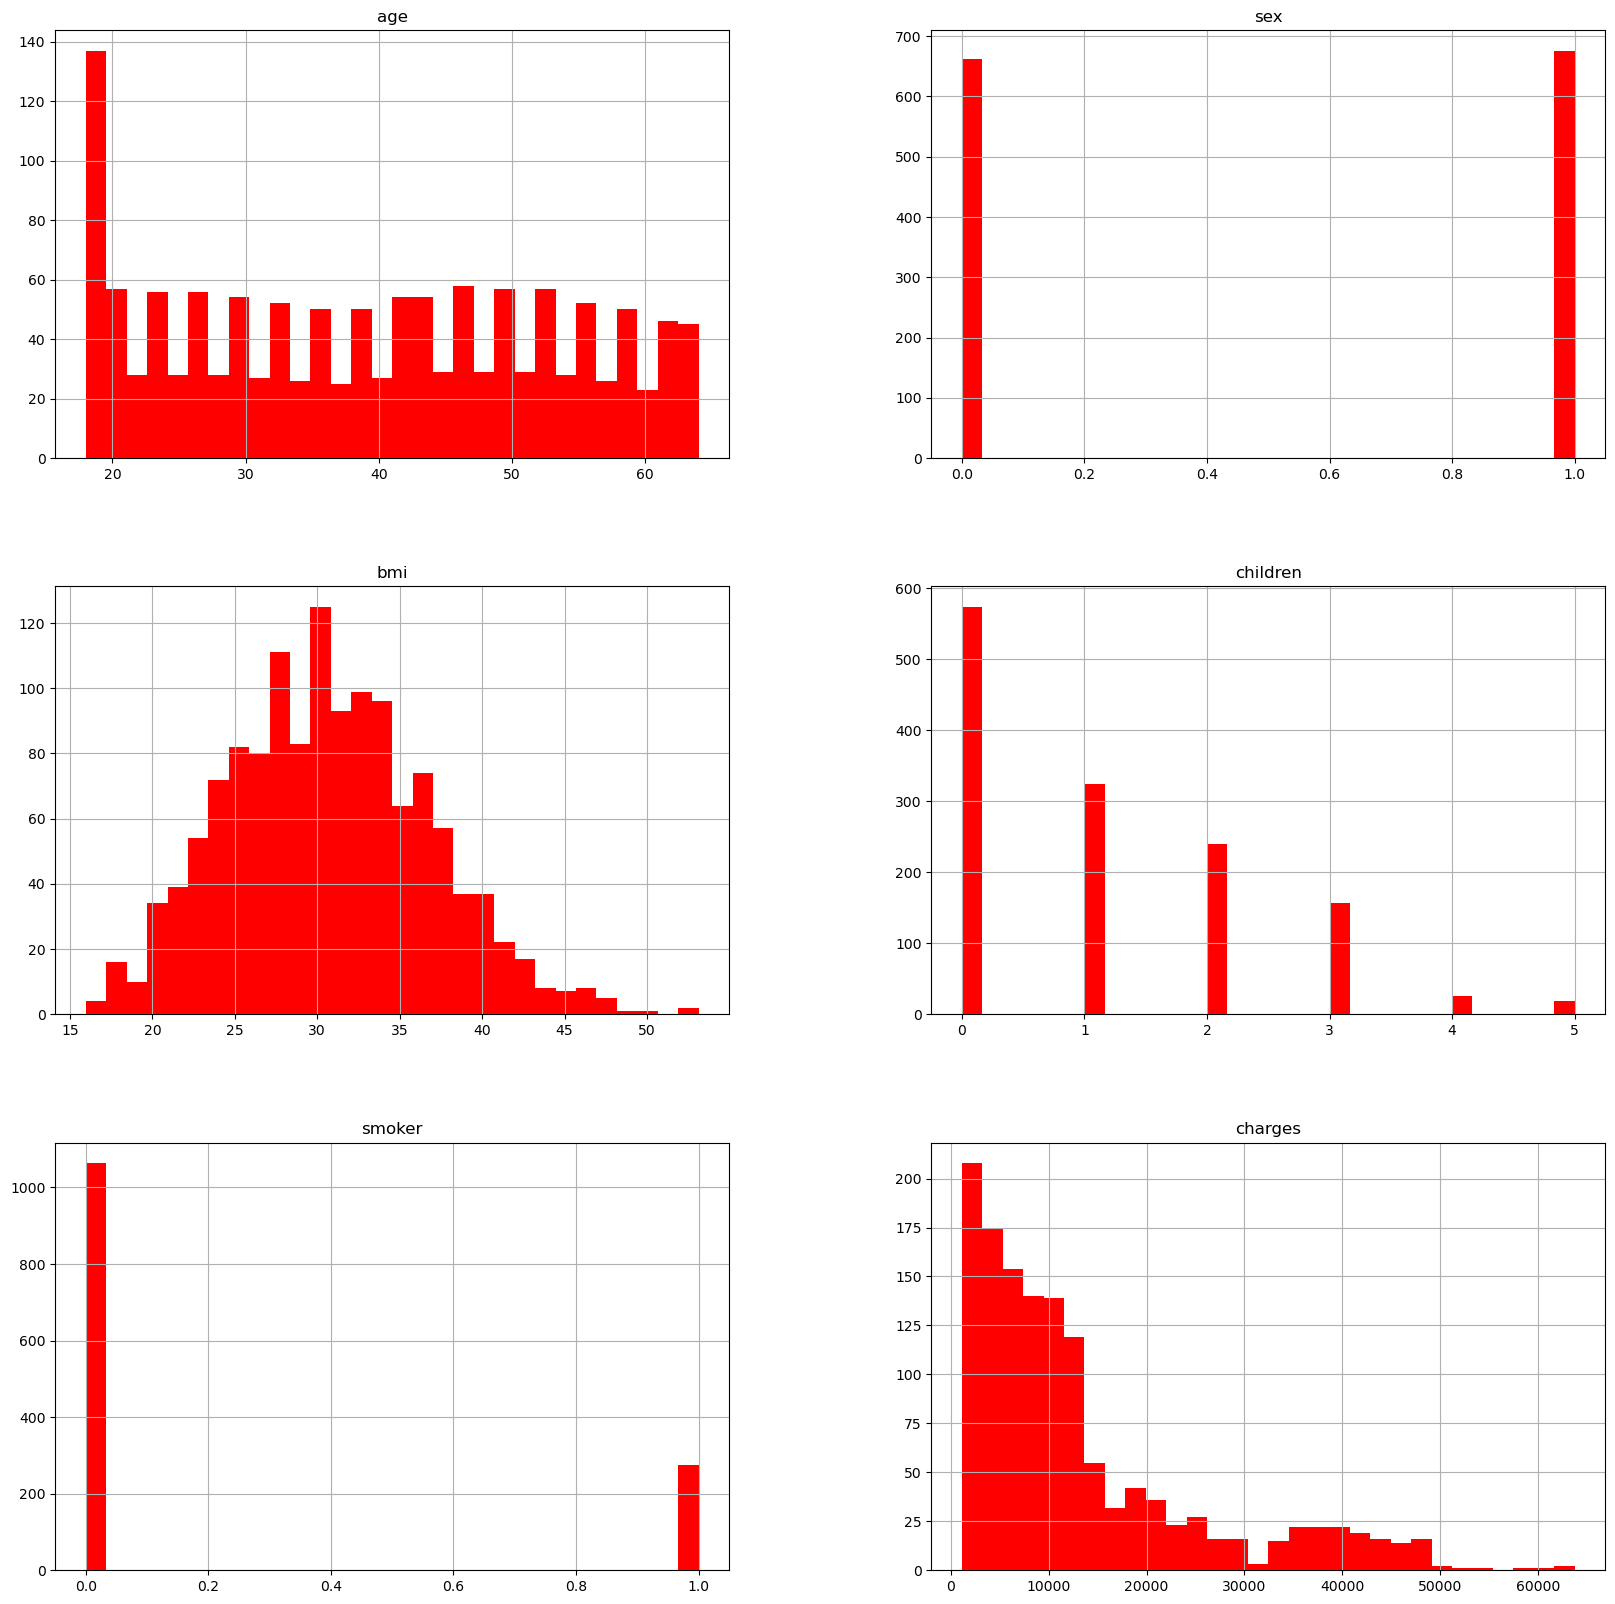

In [26]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20, 20), color = 'r')

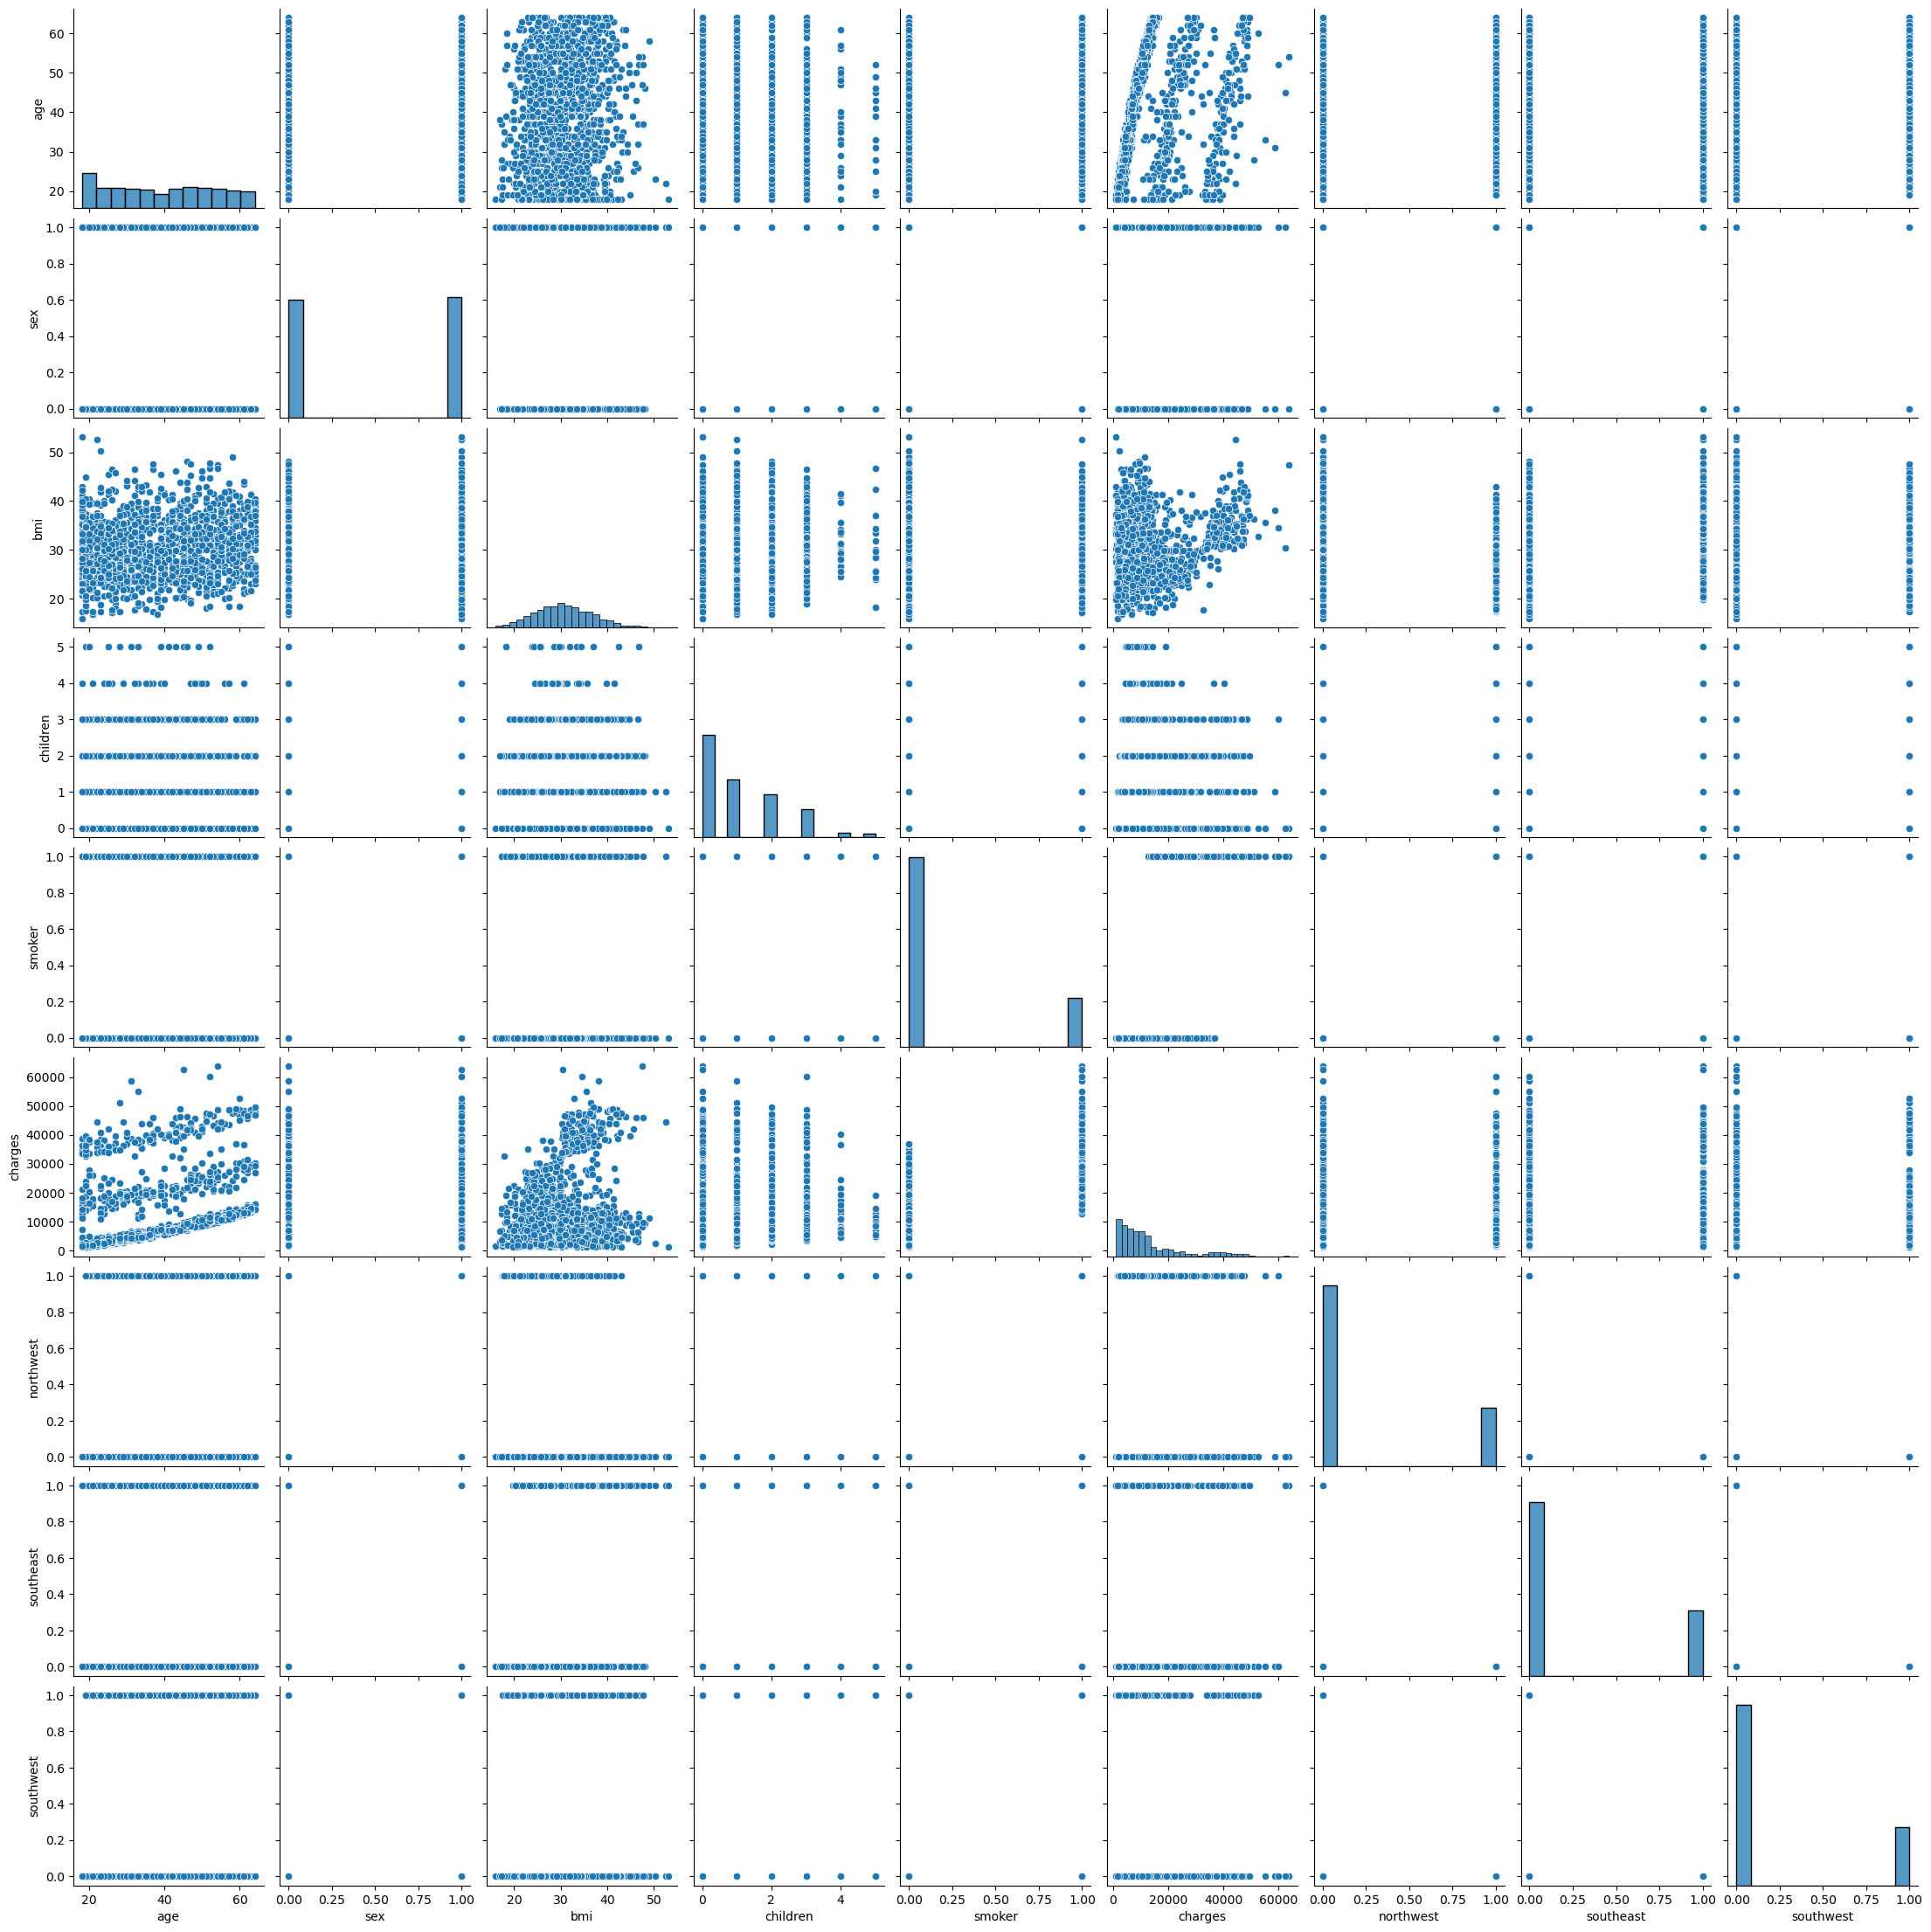

In [27]:
# Plot pairplot

sns.pairplot(insurance_df)

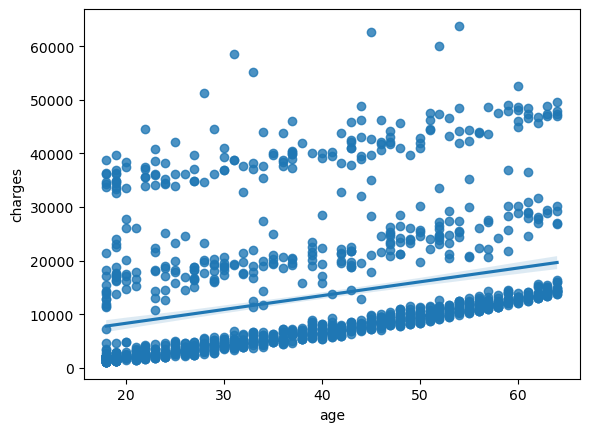

In [28]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()

MINI CHALLENGE
- Obtain the regplot between bmi and charges

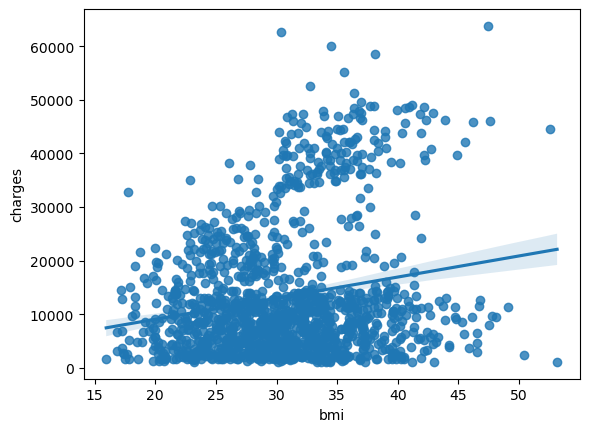

In [29]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

MINI CHALLENGE
 - Calculate and plot the correlation matrix
 - Which feature has the most positive correlation with charges?

<AxesSubplot:>

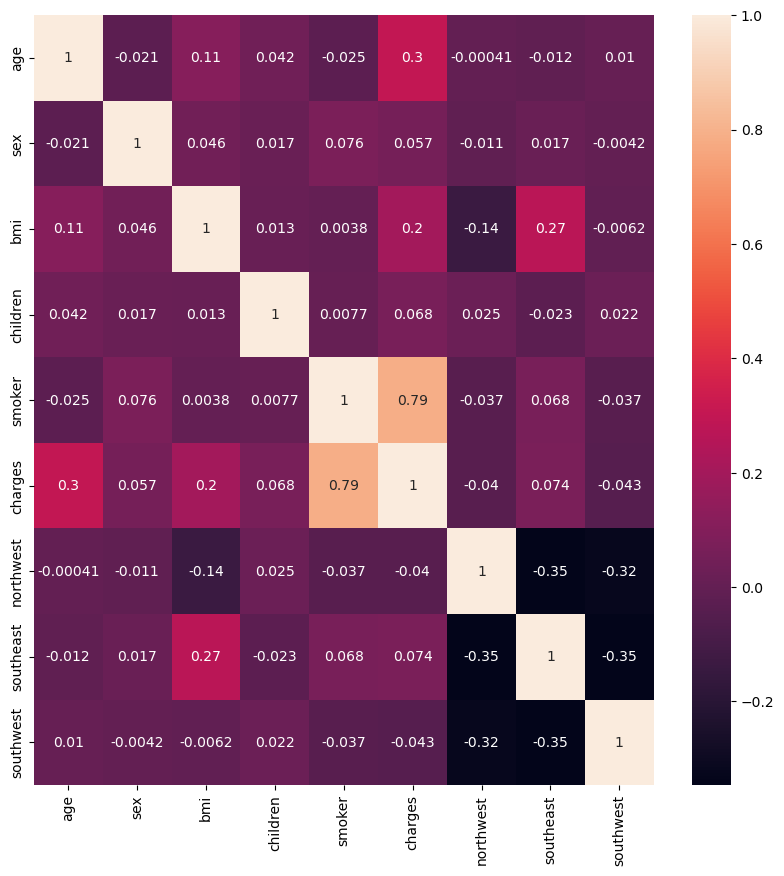

In [30]:
corr_matrix = insurance_df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True)

In [31]:
# smoker and age have positive correlations with charges

### # TASK #5: Create Training and Testing Dataset

In [32]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [33]:
X = insurance_df.drop(columns = ['charges'])
y = insurance_df['charges']

In [34]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [35]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
X.shape

(1338, 8)

In [37]:
y.shape

(1338,)

In [38]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [39]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [40]:
y

array([16884.924 ,  1725.5522,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.36  ], dtype=float32)

In [41]:
y = y.reshape(-1,1)

In [42]:
y.shape

(1338, 1)

In [43]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [45]:
# Scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [46]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

In [47]:
X_train

array([[ 0.4722265 , -1.0246016 , -1.756525  , ...,  1.7831678 ,
        -0.59966105, -0.5723141 ],
       [ 0.5433129 , -1.0246016 , -1.0330824 , ..., -0.5607997 ,
        -0.59966105, -0.5723141 ],
       [ 0.8987451 , -1.0246016 , -0.9436866 , ..., -0.5607997 ,
         1.6676087 , -0.5723141 ],
       ...,
       [ 1.3252636 ,  0.9759891 , -0.89153934, ..., -0.5607997 ,
        -0.59966105, -0.5723141 ],
       [-0.16755138, -1.0246016 ,  2.820864  , ..., -0.5607997 ,
        -0.59966105,  1.7472923 ],
       [ 1.1120044 ,  0.9759891 , -0.1093272 , ..., -0.5607997 ,
        -0.59966105,  1.7472923 ]], dtype=float32)

In [48]:
X_test

array([[ 0.45859584, -0.95618284, -0.937152  , ..., -0.58884096,
        -0.6581451 , -0.5428499 ],
       [-0.1871328 , -0.95618284, -0.1675267 , ...,  1.6982515 ,
        -0.6581451 , -0.5428499 ],
       [ 1.8218007 , -0.95618284, -0.6655195 , ...,  1.6982515 ,
        -0.6581451 , -0.5428499 ],
       ...,
       [-0.04363755,  1.045825  , -0.4844313 , ..., -0.58884096,
        -0.6581451 , -0.5428499 ],
       [ 1.1043246 , -0.95618284,  2.5948634 , ..., -0.58884096,
         1.5194216 , -0.5428499 ],
       [ 0.88908166, -0.95618284,  0.4964636 , ..., -0.58884096,
        -0.6581451 ,  1.8421298 ]], dtype=float32)

In [49]:
y_train

array([[-0.34562078],
       [-0.40048784],
       [ 1.1463315 ],
       ...,
       [-0.11777737],
       [ 2.7274609 ],
       [-0.26065275]], dtype=float32)

In [50]:
y_test

array([[-3.10857505e-01],
       [-6.17673516e-01],
       [ 1.31322765e+00],
       [-2.94258237e-01],
       [ 1.66791081e+00],
       [-6.76736474e-01],
       [-8.70873094e-01],
       [ 9.96974781e-02],
       [-7.41234183e-01],
       [-2.17006400e-01],
       [ 4.24634725e-01],
       [-4.58398610e-01],
       [-7.23995805e-01],
       [ 2.66317129e+00],
       [ 2.86561584e+00],
       [ 2.50679159e+00],
       [-2.54210085e-01],
       [ 2.40785003e+00],
       [-3.80037159e-01],
       [ 7.06748486e-01],
       [-6.33089364e-01],
       [-4.43568766e-01],
       [-9.39978063e-01],
       [-8.19694221e-01],
       [-1.51103333e-01],
       [-1.64077237e-01],
       [-2.59816349e-02],
       [ 4.68418062e-01],
       [-2.61035830e-01],
       [-9.49993551e-01],
       [ 2.29577094e-01],
       [-9.03453752e-02],
       [-8.78640890e-01],
       [-5.83864629e-01],
       [-8.07730556e-01],
       [-4.43014771e-01],
       [-8.32314134e-01],
       [-4.51895744e-01],
       [ 8.7

MINI CHALLENGE
- Split the data into 20% Testing and 80% Training
- Double check that the split was successful by getting the shape of both the training and testing datasets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [52]:
X_train.shape

(1070, 8)

In [53]:
X_test.shape

(268, 8)

In [54]:
y_train.shape

(1070, 1)

In [55]:
y_test.shape

(268, 1)

In [68]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [70]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

### TASK #6: Train And Test a Linear Regression Model In SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [71]:
# Using Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [72]:
regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [73]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.7844873560845007

In [74]:
y_predict = regression_model_sklearn.predict(X_test)

In [75]:
y_predict

array([[-0.34496182],
       [-0.51301694],
       [ 1.9905845 ],
       [-0.30263397],
       [ 1.1530972 ],
       [-0.21312334],
       [-1.0820866 ],
       [ 0.30221182],
       [-0.9983561 ],
       [-0.1585783 ],
       [ 1.2600524 ],
       [-0.31718156],
       [-0.66115534],
       [ 2.10546   ],
       [ 2.2580624 ],
       [ 1.9981934 ],
       [ 0.16009438],
       [ 1.9005024 ],
       [-0.33560723],
       [ 1.537219  ],
       [-0.7707785 ],
       [-0.25908726],
       [-0.9105443 ],
       [-0.5217104 ],
       [-0.15078694],
       [-0.02269646],
       [ 0.10268623],
       [-0.5859449 ],
       [-0.26341838],
       [-0.92242044],
       [-0.33705813],
       [-0.01105487],
       [-0.7287578 ],
       [-0.80252707],
       [-0.7331449 ],
       [-0.02671614],
       [-0.93646413],
       [-0.36727828],
       [ 1.6943916 ],
       [ 1.6229762 ],
       [-0.772223  ],
       [-0.7439545 ],
       [ 0.07222409],
       [-0.14079309],
       [-0.37345436],
       [-0

In [76]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [77]:
y_predict_orig

array([[ 8670.133  ],
       [ 6576.185  ],
       [37770.77   ],
       [ 9197.532  ],
       [27335.775  ],
       [10312.825  ],
       [ -514.35675],
       [16733.842  ],
       [  528.91473],
       [10992.449  ],
       [28668.426  ],
       [ 9016.271  ],
       [ 4730.397  ],
       [39202.105  ],
       [41103.516  ],
       [37865.58   ],
       [14963.074  ],
       [36648.36   ],
       [ 8786.689  ],
       [32121.889  ],
       [ 3364.5056 ],
       [ 9740.119  ],
       [ 1623.0406 ],
       [ 6467.865  ],
       [11089.529  ],
       [12685.521  ],
       [14247.775  ],
       [ 5667.511  ],
       [ 9686.154  ],
       [ 1475.0641 ],
       [ 8768.611  ],
       [12830.574  ],
       [ 3888.0789 ],
       [ 2968.9226 ],
       [ 3833.4167 ],
       [12635.4375 ],
       [ 1300.0817 ],
       [ 8392.072  ],
       [34080.242  ],
       [33190.414  ],
       [ 3346.5076 ],
       [ 3698.7302 ],
       [13868.221  ],
       [11214.052  ],
       [ 8315.119  ],
       [11

In [78]:
y_test_orig

array([[ 9095.068 ],
       [ 5272.176 ],
       [29330.982 ],
       [ 9301.894 ],
       [33750.293 ],
       [ 4536.2583],
       [ 2117.3386],
       [14210.536 ],
       [ 3732.6248],
       [10264.442 ],
       [18259.217 ],
       [ 7256.723 ],
       [ 3947.4128],
       [46151.125 ],
       [48673.56  ],
       [44202.652 ],
       [ 9800.889 ],
       [42969.85  ],
       [ 8233.098 ],
       [21774.322 ],
       [ 5080.096 ],
       [ 7441.501 ],
       [ 1256.2985],
       [ 2755.0212],
       [11085.587 ],
       [10923.934 ],
       [12644.589 ],
       [18804.752 ],
       [ 9715.841 ],
       [ 1131.5065],
       [15828.821 ],
       [11842.624 ],
       [ 2020.5524],
       [ 5693.4307],
       [ 2904.0876],
       [ 7448.404 ],
       [ 2597.779 ],
       [ 7337.748 ],
       [23887.662 ],
       [38709.176 ],
       [ 4687.7964],
       [ 2643.2683],
       [11674.13  ],
       [12124.992 ],
       [ 4889.9995],
       [12333.828 ],
       [ 3579.8289],
       [ 4391

In [79]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [80]:
# Obtain Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)

In [81]:
RMSE

5784.295

In [82]:
MSE

33458066.0

MINI CHALLENGE
- calculate the mean absolute error, R2 and adjusted R2

In [83]:
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1)/(n-k-1)

In [84]:
MAE

4047.707

In [85]:
r2

0.7844873652958066

In [86]:
adj_r2

0.7778306043783026

In [87]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5784.295 
MSE = 33458066.0 
MAE = 4047.707 
R2 = 0.7844873652958066 
Adjusted R2 = 0.7778306043783026


### TASK #7: Train A Linear Learner Model Using Sagemaker

In [88]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [89]:
# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [90]:
# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'medical-insurance-prediction' # bucket name
prefix = 'linear-learner' # prefix is the subfolder within the folder. To specify this region: US East (Ohio) us-east-2

# Specify the region
region = 'us-east-2'

In [91]:
# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml
arn:aws:iam::756970149474:role/service-role/AmazonSageMaker-ExecutionRole-20231018T143251


In [92]:
X_train.shape

(1070, 8)

In [93]:
y_train.shape

(1070, 1)

In [94]:
X_test.shape

(268, 8)

In [95]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O).
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common library

# Code below converts the data in numpy array format to RecordIO Format
# This is the format required by Sagemaker Linear Learner

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writting to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.reshape(-1))
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset back to zero

0

In [96]:
import os

# Code to upload RecordIO data to S3
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in S3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://medical-insurance-prediction/linear-learner/train/linear-train-data
